### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [4]:
df.head(10)

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8   4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7   4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4   2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5   3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9   4.4  1017.3  61.0  1.3  8.7  22.2  200.645833
5  16.0  25.2  10.0  1013.2  79.0  0.6  4.8  11.1  285.225000
6  13.4  21.0   9.2  1015.1  87.0  0.5  1.5   7.6  236.825000
7  14.3  22.6   6.6  1016.3  76.0  0.8  0.4   3.5  276.908333
8  12.7  18.9   7.3  1021.2  76.0  1.8  6.1  16.5  108.000000
9  11.9  18.9   6.3  1020.1  76.0  1.1  8.3  20.6  107.625000

In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

<AxesSubplot:>

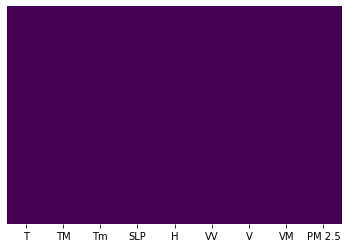

In [7]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...    ...
1088  False  False  False  False  False  False  False  False
1089  False  False  False  False  False  False  False  False
1090  False  False  False  False  False  False  False  False
1091  False  False  False  False  False  False  False  False
1092  False  False  False  False  False  False  False  False

[1092 rows x 8 columns]

In [8]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

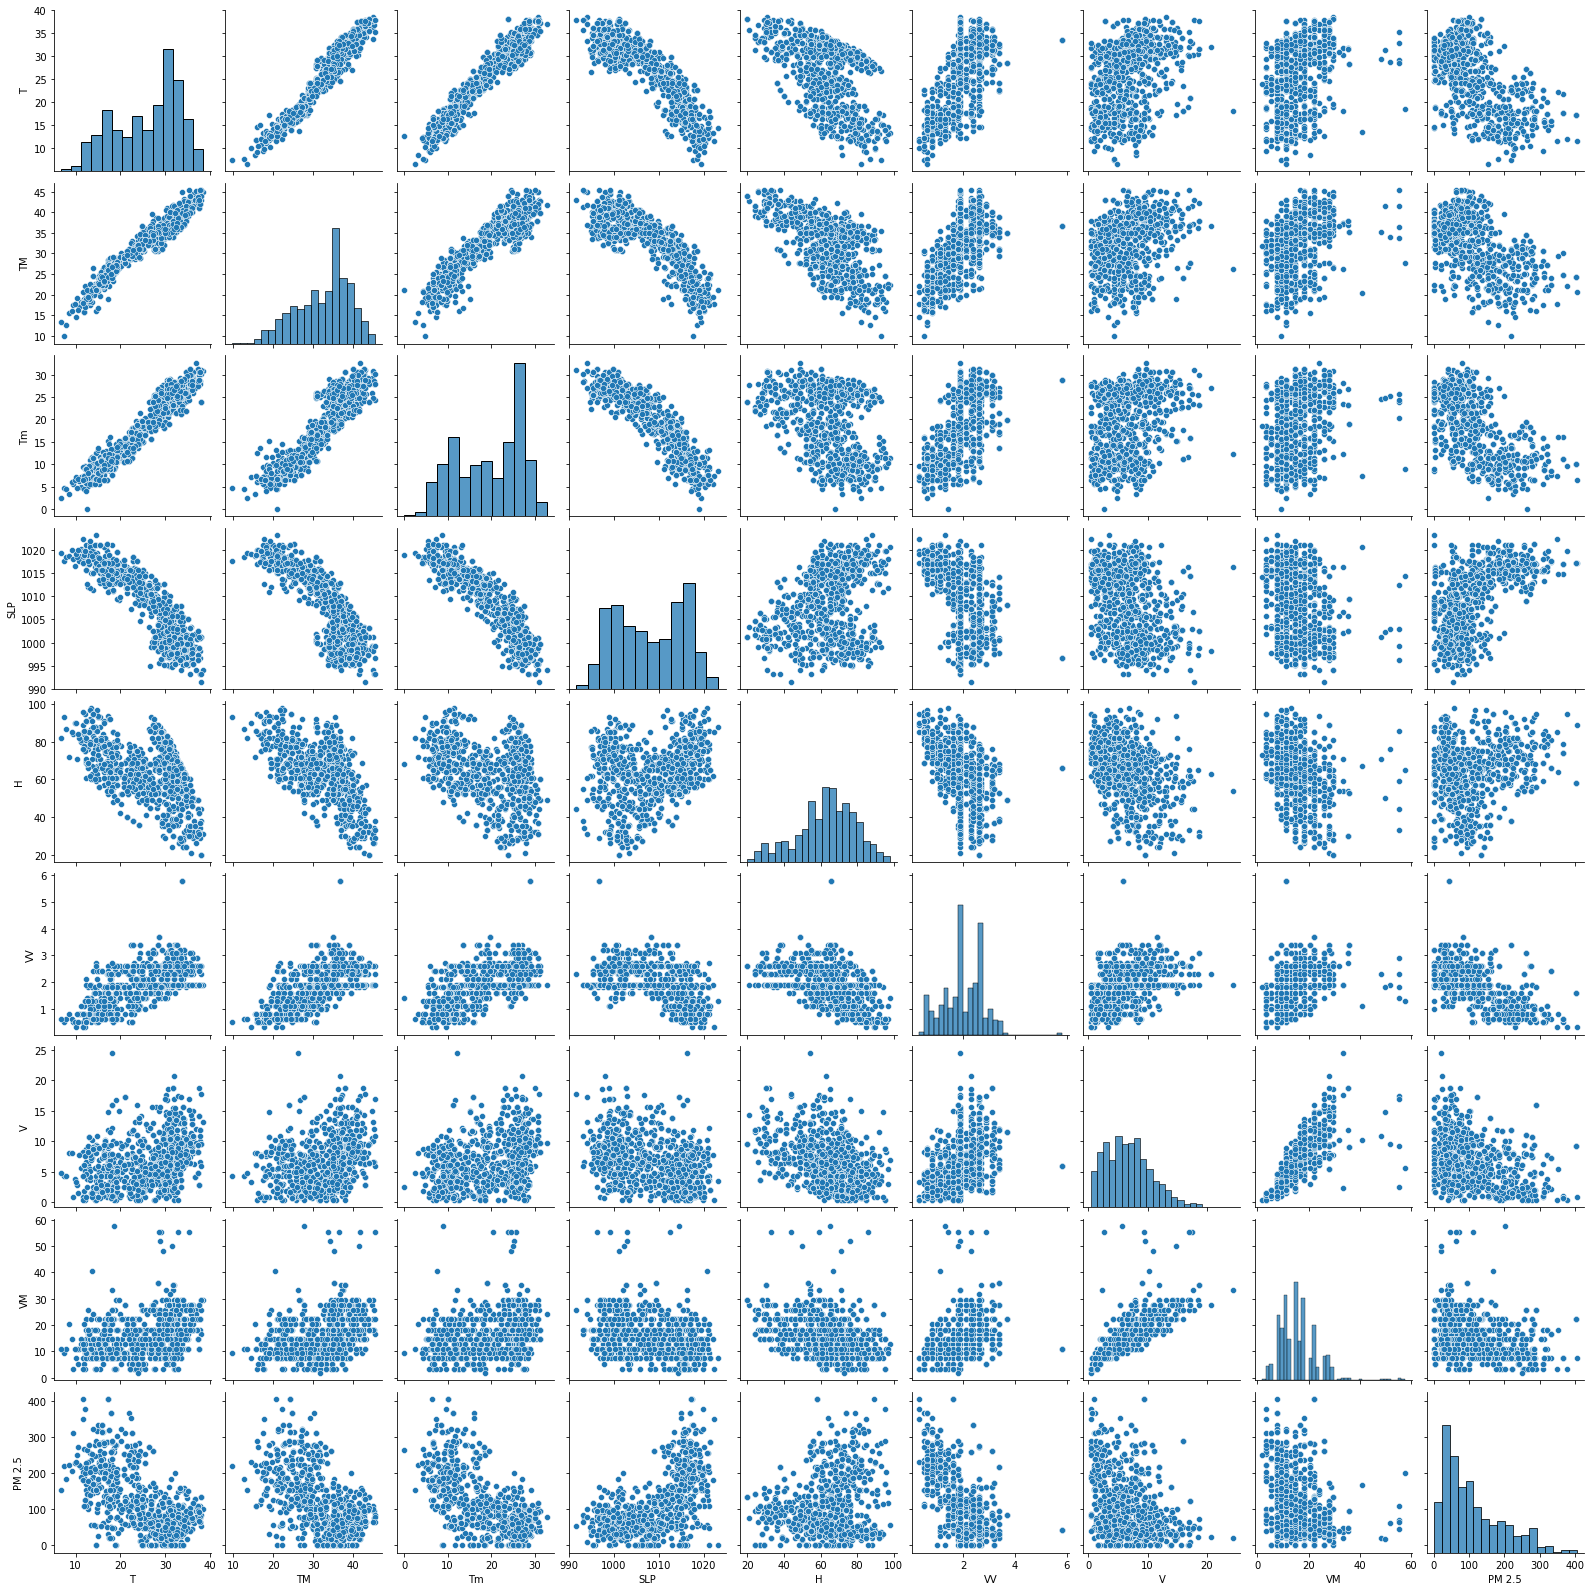

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

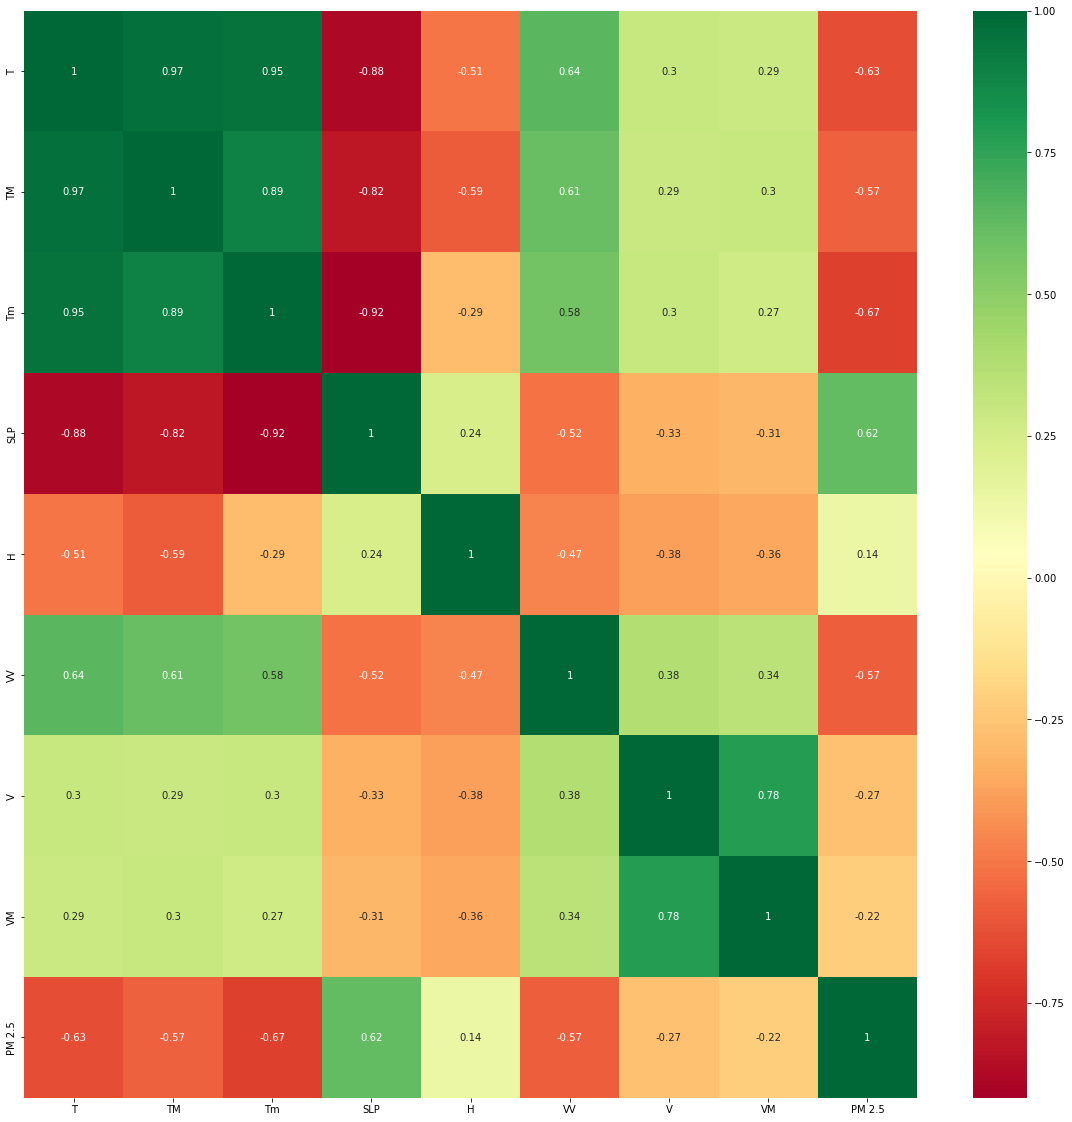

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [15]:
print(model.feature_importances_)

[0.14629723 0.10043529 0.21829675 0.16680641 0.08466612 0.18645657
 0.05298008 0.04406154]


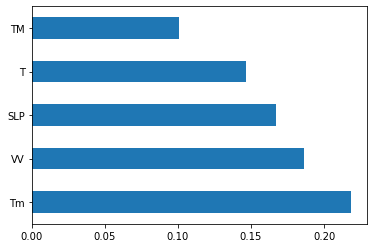

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

C:\Users\AN20259618\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

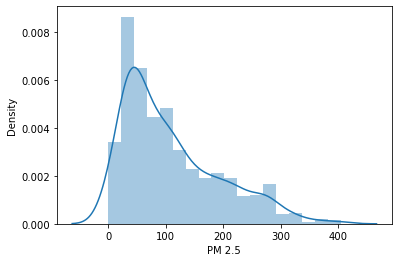

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [22]:
regressor.intercept_

448.1161696758889

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.485253313085679


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [26]:
score.mean()

0.4710569304807393

#### Model Evaluation

In [27]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
T      -2.690908
TM      0.462200
Tm     -3.867052
SLP    -0.044949
H      -1.211936
VV    -40.114908
V      -2.535633
VM      0.561482

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [28]:
prediction=regressor.predict(X_test)

C:\Users\AN20259618\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

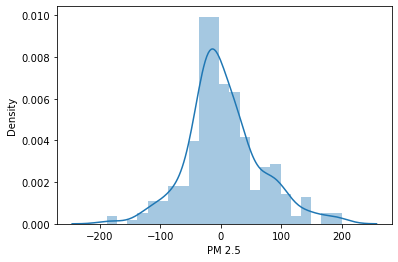

In [29]:
sns.distplot(y_test-prediction)

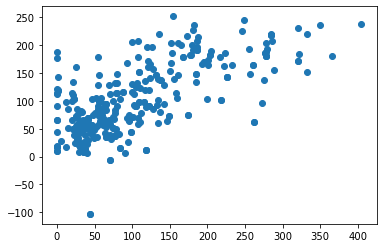

In [30]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.83624126628639
MSE: 3687.543030932418
RMSE: 60.72514331751238


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print(r2)

0.485253313085679


In [37]:
X_test.shape

(328, 8)

In [36]:
n=X_test.shape[0]
k=X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.47234430526337623


In [117]:
import pickle 

In [118]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

In [ ]:
MAE
MSE
RMSE
R2
Adjusted R2

AIC/BIC = Advance Metrics for Regression
